In [576]:
import requests
import pandas as pd
import sys
import numpy as np
!{sys.executable} -m pip install lxml
from bs4 import BeautifulSoup as bs
from datetime import datetime, time, date
# return BS html object from a url
def html_of(x):
    headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}

    fp =requests.get(x, headers = headers)
    html = bs(fp.text)
    return html

In [577]:
# pulling html and throwing into a df object
html = (html_of("http://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"))

trim = html.find("table", {"class":"table table-striped table-responsive-md"})

df = pandas.read_html(trim.prettify())
df = df[0]

df.columns = ['rank','x_class','Date', 'region', 'start', 'max', 'end','movie']
df = df.drop(['movie'], axis = 1)
df

,rank,x_class,Date,region,start,max,end
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


fix_columns takes in a row, converts the date column to a datetime object, and adds three new datetime columns for the start, max, and stop times.

In [578]:
def fix_columns(row):
    row['DateNew'] = date.fromisoformat(row['Date'].replace("/","-"))
    row['StartDT'] = datetime.combine(row['DateNew'], time.fromisoformat(row['start']))
    row['MaxDT'] = datetime.combine(row['DateNew'], time.fromisoformat(row['max']))
    row['EndDT'] = datetime.combine(row['DateNew'], time.fromisoformat(row['end']))
    return row
#apply fix_column to each row
df1 = df.apply(fix_columns, axis = 1)
#old columns being dropped off
df1 = df1.drop(['Date', 'DateNew', 'start', 'max', 'end'], axis = 1)
#adding leading 0s to region column
df1['region'] = df1['region'].apply(lambda x: '{:004}'.format(x))
print(df1.to_string(index=False))
#final 

 rank x_class region             StartDT               MaxDT               EndDT
    1    X28+   0486 2003-11-04 19:29:00 2003-11-04 19:53:00 2003-11-04 20:06:00
    2    X20+   9393 2001-04-02 21:32:00 2001-04-02 21:51:00 2001-04-02 22:03:00
    3  X17.2+   0486 2003-10-28 09:51:00 2003-10-28 11:10:00 2003-10-28 11:24:00
    4    X17+   0808 2005-09-07 17:17:00 2005-09-07 17:40:00 2005-09-07 18:03:00
    5   X14.4   9415 2001-04-15 13:19:00 2001-04-15 13:50:00 2001-04-15 13:55:00
    6     X10   0486 2003-10-29 20:37:00 2003-10-29 20:49:00 2003-10-29 21:01:00
    7    X9.4   8100 1997-11-06 11:49:00 1997-11-06 11:55:00 1997-11-06 12:01:00
    8    X9.3   2673 2017-09-06 11:53:00 2017-09-06 12:02:00 2017-09-06 12:10:00
    9      X9   0930 2006-12-05 10:18:00 2006-12-05 10:35:00 2006-12-05 10:45:00
   10    X8.3   0486 2003-11-02 17:03:00 2003-11-02 17:25:00 2003-11-02 17:39:00
   11    X8.2   2673 2017-09-10 15:35:00 2017-09-10 16:06:00 2017-09-10 16:31:00
   12    X7.1   0720 2005-01

# Part2: 

Scraping data from http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html:

In [579]:
nasa_html = html_of("http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")

In [580]:
text = nasa_html.find("pre")
print(text)

<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  

In [581]:
import re
text_string = str(text)
# might have taken an hour on this dataset to get here but alas, a cheeky regex
regex = re.compile("<[^>]*>")
text_string = re.sub(regex, " ", text_string)
print(text_string)

 
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15   8000    4000    S25E16  8026 M1.3    04/01  15:18   74   79   312     PHTX 
1997/04/07 14:30 04/07 17:30  11000    1000    S28E19  8027 C6.8    04/07  14:27 Halo  360   878     PHTX 
1997/05/12 05:15 05/14 16:00  12000      80    N21W08  8038 C1.3    05/12  05:30 Halo  360   464     PHTX 
1997/05/21 20:20 05/21 22:00   5000     500    N05W12  8040 M1.3    05/21

In [582]:
line_list = text_string.splitlines()
# looking for first useful element, trim up to that point

print(line_list[12])
line_list = line_list[12::]

1997/04/01 14:00 04/01 14:15   8000    4000    S25E16  8026 M1.3    04/01  15:18   74   79   312     PHTX 


In [583]:
line_list[517]
# last element

'2017/09/17 11:45 09/17 12:35  16000     900   S08E170 ----- ----    09/17  12:00 Halo  360  1385     PHTX   STEREO A data'

In [584]:
# trimming line list
line_list = line_list[:518]


In [585]:
nasa_df = pandas.DataFrame(line_list)
nasa_df
# complete mess at this point -- 1 single column of text

,0
0,1997/04/01 14:00 04/01 14:15 8000 4000 ...
1,1997/04/07 14:30 04/07 17:30 11000 1000 ...
2,1997/05/12 05:15 05/14 16:00 12000 80 ...
3,1997/05/21 20:20 05/21 22:00 5000 500 ...
4,1997/09/23 21:53 09/23 22:16 6000 2000 ...
...,...
513,2017/09/04 20:27 09/05 04:54 14000 210 ...
514,2017/09/06 12:05 09/07 08:00 16000 70 ...
515,2017/09/10 16:02 09/11 06:50 16000 150 ...
516,2017/09/12 07:38 09/12 07:43 16000 13000 ...


In [586]:
# dividing into columns based on whitespace
nasa_df = nasa_df[0].str.split(expand = True)

In [587]:

nasa_df.rename( columns={0:'strt_dte', 1: 'strt_tme', 2: 'end_dte',  3: 
                         'end_tme', 4: 'start_freq', 5: 'end_freq', 6:'flr_loc',7: 
                         'flr_reg', 8: 'flr_class', 9: 'cme_dte',10: 'cme_time',11: 
                         'cme_ang', 12:'cme_width',13:'cme_speed'}, inplace=True )
# gross


In [588]:
nasa_df.drop([ 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], axis =1, inplace = True)
nasa_df = nasa_df.replace('FILA', np.nan)
nasa_df

,strt_dte,strt_tme,end_dte,end_tme,start_freq,end_freq,flr_loc,flr_reg,flr_class,cme_dte,cme_time,cme_ang,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [589]:
regex = re.compile(".*-+.*")
nasa_df.replace(regex, np.nan, inplace = True)
nasa_df.replace(".*\?+.*", np.nan, inplace = True)

In [590]:
# repairing data 
df = nasa_df
df['isHalo'] = df['cme_ang'].apply(lambda x: x == "Halo")
df['cme_ang'] = df['cme_ang'].apply(lambda x: "NA" if (x == 'Halo') else x)
df['is_lBound'] = df['cme_width'].apply(lambda x: not str(x).isdigit())
df['cme_width'] = df['cme_width'].apply(lambda x: re.sub("\D", "", str(x)))
df = df.replace(r'^\s*$', np.nan, regex = True)
# function to fix time column of each row,
def time_fix(row):
    row['Start'] = datetime.combine(date.fromisoformat(row['strt_dte'].replace("/","-")), 
                                time.fromisoformat(row['strt_tme']))
    row['End'] = datetime.combine(date.fromisoformat(str(row['Start'].year) + "-" + row['end_dte'].replace("/","-")), 
                                time.fromisoformat(row['end_tme'].replace("24:00", "23:59")))
    row['cme_tme'] = np.nan if row['cme_dte'] !=row['cme_dte'] else datetime.combine(date.fromisoformat(str(row['Start'].year) + "-" + str(row['cme_dte']).replace("/","-")), 
                                time.fromisoformat(str(row['cme_time']).replace("24:00", "23:59")))
    return row
df = df.apply(time_fix, axis = 1)
df.drop(['strt_tme', 'strt_dte', 'cme_dte', 'end_tme', 'end_dte', 'cme_time'], axis = 1, inplace = True)
print(list(df.columns.values))             

['start_freq', 'end_freq', 'flr_loc', 'flr_reg', 'flr_class', 'cme_ang', 'cme_width', 'cme_speed', 'isHalo', 'is_lBound', 'Start', 'End', 'cme_tme']


In [591]:
df = df[['Start', 'End',  'start_freq', 'end_freq', 'flr_loc', 'flr_reg', 'flr_class', 'cme_tme',
          'cme_ang', 'cme_width', 'cme_speed',
          'isHalo', 'is_lBound']]

# Part 2: Analysis
## Question 1: Replication: Ranking Nasa Data by Solar Flare Classification

In [592]:
from IPython.display import display, HTML
display(HTML(df.to_html(index = False)))

Start,End,start_freq,end_freq,flr_loc,flr_reg,flr_class,cme_tme,cme_ang,cme_width,cme_speed,isHalo,is_lBound
1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,True,False
1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


The goal here is to rank the table above by the entries' flare classification, just like the below table scraped from spaceweatherlive.com

In [593]:
display(HTML(df1.to_html(index = False)))

rank,x_class,region,StartDT,MaxDT,EndDT
1,X28+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
4,X17+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
6,X10,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
9,X9,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [594]:
# regex to capture first letter and remaining float from 
# flr_class col in seperate groups

char_regex = re.compile('^([A-Z]{1})(.*)$')
# determines a relative magnitude for comparison purpose of flr_class strings
def flr_mag(flr):
    # ranking stop at $9 where $ is a letter [a,b,c,m] 
    # while X rankings can go higher
    class_dict = {
         'A' : 0,
         'B' : 10,
         'C' : 20,
         'M' : 30,
         'X' : 40}
    if pandas.isnull(flr):
        return 0
    else:
        groups = char_regex.match(flr).groups()
        return class_dict[groups[0]] + float(groups[1])

In [595]:
# sorts the nasa dataset by using .map(flr_mag) as a key func
df_sorted = df.sort_values('flr_class', ascending = False, key = lambda x: x.map(flr_mag)).reset_index(drop = True)
# printing largest 50 values
display(HTML(df_sorted[:50].reset_index(drop = True).to_html(index = True)))

,Start,End,start_freq,end_freq,flr_loc,flr_reg,flr_class,cme_tme,cme_ang,cme_width,cme_speed,isHalo,is_lBound
0,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
2,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
4,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,True
8,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False


Data can be replicated seemingly very well, notable inconsistencies include \#4 on the original dataset, having a classification of X17+. Intrestingly, the nasa entry for that same flare lists it as X1.7, so this seems to be a case of data inconsistency more than processing error. \#16 as well as a few others are wholly missing from the nasa dataset. 

## Question 2: Integration
### Finding closest Nasa match for each SpaceWeatherLive Entry

Here I will attempt to first find a match by date, duration, and class, giving the largest weight to class. To do this I will use min(dur1/dur2, dur2/dur1) + 4*min(class1/class2, class2/class1) + 1/(time distance in terms of days)

In [596]:
def confidence(sp_row, nasa_row ):
    sp_dur = (sp_row['EndDT'] - sp_row['StartDT']).total_seconds()
    #regex below fixes the swl class data to be used in the same magnitude function I made earlier
    sp_mag = flr_mag(re.sub("[^a-zA-Z0-9\.]", "", str(sp_row['x_class'])))
    nasa_dur =  (nasa_row['End']- nasa_row['Start']).total_seconds()
    nasa_mag = flr_mag(nasa_row['flr_class'])
    date_diff = (nasa_row['Start'] -  sp_row['StartDT'])
    if nasa_mag == 0 : nasa_mag = np.nan
    # .01 added to avoid div/0
    conf = abs(min(sp_dur/(nasa_dur+.01), nasa_dur/(sp_dur+.01)))
    if not np.isnan(nasa_mag): conf+= 4*abs(min(sp_mag/nasa_mag, nasa_mag/sp_mag))
    conf+= 1/(((abs(sp_row['StartDT'] - 
                    nasa_row['Start']).total_seconds())/86400) + 1)
    return conf/6

In [597]:
#function that findes the most similiar index in the nasa dF
def maxNasa(sp_row, nasaDf):
    maxC = 0
    ind = 0
    for index,row in nasaDf.iterrows():
        if confidence(sp_row, row) > maxC:
            maxC = confidence(sp_row, row)
            ind = index
    return ind
#iterate through nasaDf for each value, and add the most similiar nasa entry in a new column
df1['nasa_row'] = df1.apply(lambda x: maxNasa(x, df_sorted), axis = 1)

In [598]:
display(HTML(df1.to_html(index = False)))

rank,x_class,region,StartDT,MaxDT,EndDT,nasa_row
1,X28+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0
2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,1
3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,2
4,X17+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,53
5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,3
6,X10,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,4
7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,5
8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,6
9,X9,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,7
10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,9


In [ ]:
# iterating through to update nasaTable with swl rank
df_sorted['SWL_Rak'] = 0
for index, row in df_sorted.iterrows():
    if len(df1.loc[df1['nasa_row'] == index]) > 0:
         df_sorted.at[index, 'SWL_Rank']= df1.loc[df1['nasa_row'] == index].index[0]

In [599]:
display(HTML(df_sorted.to_html(index = True)))

,Start,End,start_freq,end_freq,flr_loc,flr_reg,flr_class,cme_tme,cme_ang,cme_width,cme_speed,isHalo,is_lBound,SWL_Rak,SWL_Rank
0,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False,0,0.0
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,0,1.0
2,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False,0,2.0
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,0,4.0
4,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False,0,5.0
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,0,6.0
6,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,0,7.0
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,True,0,8.0
8,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False,0,10.0
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False,0,9.0


# Question 3: Integration

In [600]:
#collecting data on whcih months had how many flares, and how many of those were in top 50
total_array = np.zeros(12)
top50_array = np.zeros(12)
for index, row in df_sorted.iterrows():
    total_array[row['Start'].month -1] += 1
for index, row in df1.iterrows():
    top50_array[row['StartDT'].month -1] += 1 
top50_array
montharr = np.stack((total_array, top50_array))
monthdF = pandas.DataFrame(data = montharr,  index = ['total', 'top50'])

In [601]:
monthDF = monthdF.T

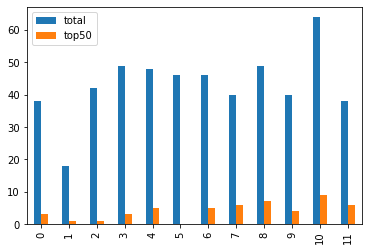

In [602]:
from matplotlib.pyplot import *
plot = monthDF.plot.bar()
plot

This plot shows the month by month frequency of solar flares, and simutanuesly the frequency of the strongest 50 flares. It appears that teh concentration of flares is highest in the second half of the year, and this holds for both the top50 and the total. February seems to be an outlier with seemingly half the flares as most other months. Could partially be due it being a shorter month, but that should be at most a ~6% reduction compared to other months.